In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("abalone.csv")

In [2]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


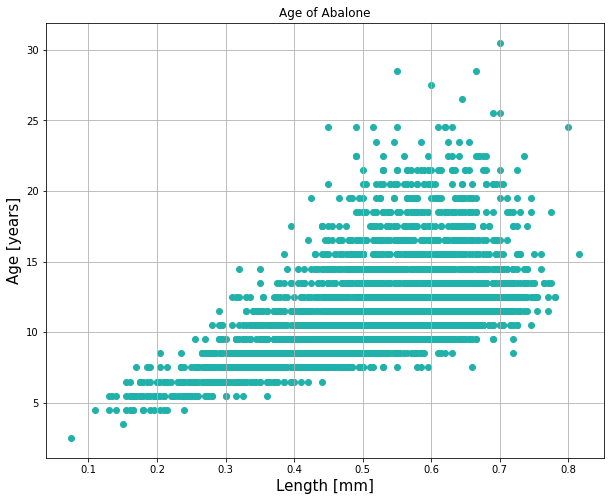

In [30]:
X = df["Length"].values
y = df["Rings"].values + 1.5 # age of the abalone in years


plt.figure(figsize=(10, 8))
plt.scatter(X[:], y, color = "lightseagreen")
plt.xlabel("Length [mm]", fontsize = 15)
plt.ylabel("Age [years]", fontsize = 15)
plt.title("Age of Abalone")
plt.grid(True)
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [60]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth = 1, random_state = 4)
reg1.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred1)} \n")


reg2 = DecisionTreeRegressor(max_depth = 5, random_state = 4)
reg2.fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred2)} \n")

MSE reg1: 7.369290796554643 

MSE reg2: 6.799933473678337 



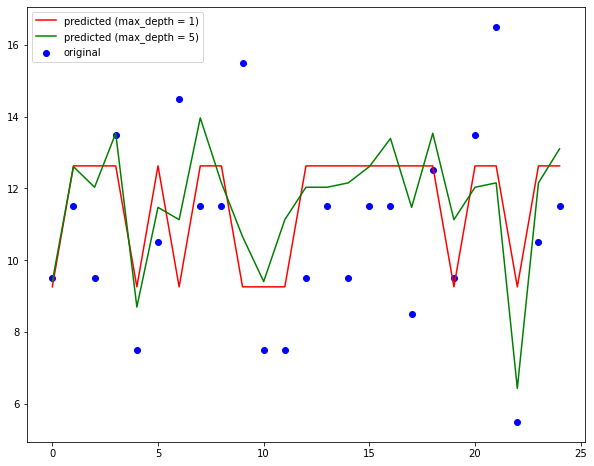

In [62]:
x_ax = range(len(y_test[:25]))
plt.figure(figsize = (10, 8))
plt.scatter(x_ax, y_test[:25], color="blue", label="original")
plt.plot(x_ax, y_pred1[:25], color="red", label="predicted (max_depth = 1)")
plt.plot(x_ax, y_pred2[:25], color="green", label="predicted (max_depth = 5)")
plt.legend()
plt.show()